# Exploring NBA 2013-2014 Season Using K-Means

Tutorial: [Computer Science](https://www.youtube.com/watch?v=2Pmf6Kqak3w&ab_channel=ComputerScience)
Dataset: []


### Import Modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/nba_2013.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


### 1. Get the information from the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
df.shape

(481, 31)

There are 481 rows with 31 columns

### 2. Get the average of the numeric columns

In [6]:
df.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

### 3. Get the mean/average of specific column

* fg : Field Goal
* ast : Assist
* trb : Total Rebound Percentage

In [7]:
target = ['ast', 'fg', 'trb']

In [8]:
print("Mean of the target:")
[f"{idx+1}. {val} {df.loc[:,val].mean()}" for idx, val in enumerate(target)]

Mean of the target:


['1. ast 112.53638253638253',
 '2. fg 192.88149688149687',
 '3. trb 218.62785862785861']

### 4. Make a pairwise scatter plot

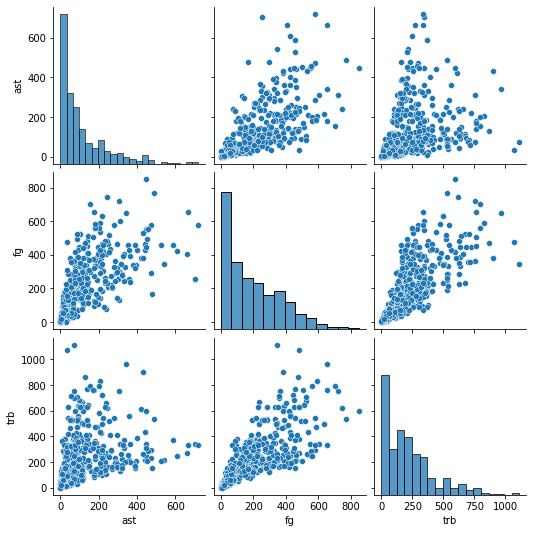

In [9]:
sns.pairplot(df[target])

### 5. Make heatmap to see corellations

In [10]:
df[target].corr()

,ast,fg,trb
ast,1.000000,0.708228,0.369862
fg,0.708228,1.000000,0.769339
trb,0.369862,0.769339,1.000000


<AxesSubplot:>

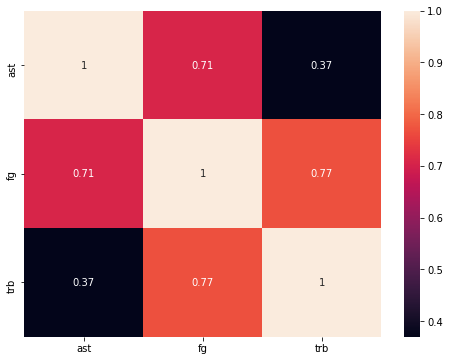

In [11]:
plt.figure(figsize=(8,6))
correlations = df[target].corr()

sns.heatmap(correlations, annot=True)

### 6. Makecluster of players using KMeans

In [12]:
from sklearn.cluster import KMeans

# Creating KMeans model with 5 clusters
kmeans_model = KMeans(n_clusters=5, random_state=1)

# Get all numeric data and clean up the null value
good_columns = df._get_numeric_data().dropna(axis=1)

# Training the models
kmeans_model.fit(good_columns)

# Get the labels or (cluster label for each player)
labels = kmeans_model.labels_

In [13]:
print("Labels value:\n\n", labels)
print("\nLabels length:", len(labels))

Labels value:

 [0 0 0 3 0 2 3 0 4 4 4 2 4 4 1 0 4 3 2 0 1 2 0 0 1 2 0 2 2 2 4 4 1 4 2 1 4
 3 4 2 0 3 0 1 0 4 2 2 0 4 4 4 4 2 2 4 0 4 1 3 1 4 1 2 4 2 2 2 2 0 2 1 1 4
 1 2 2 0 0 0 1 4 2 1 1 3 4 1 4 1 2 2 0 2 2 4 2 1 0 3 2 3 2 2 1 1 0 4 2 2 3
 4 2 2 2 3 0 4 2 2 2 0 1 3 1 0 0 0 3 3 4 1 1 3 2 2 3 2 0 0 1 1 0 2 1 2 4 2
 4 4 1 2 2 0 1 0 0 0 1 1 3 0 3 1 4 2 2 2 2 2 1 3 0 2 4 4 1 3 0 3 2 0 2 0 4
 3 4 2 2 0 2 2 2 1 0 1 0 3 1 0 1 1 1 4 1 4 2 1 0 2 2 0 3 0 4 3 4 4 3 2 1 1
 2 2 2 3 2 2 2 3 1 2 3 0 1 0 0 3 2 1 2 2 0 2 1 1 0 0 1 2 4 4 0 3 1 4 2 2 0
 4 2 2 1 2 1 3 2 1 2 0 0 2 3 1 4 0 1 3 3 2 4 0 1 4 0 0 1 2 3 2 2 4 0 0 2 2
 1 1 1 2 1 0 0 0 4 0 4 3 2 2 3 4 2 4 1 4 0 2 4 2 2 2 2 2 2 2 0 2 1 0 3 2 3
 2 0 0 2 1 4 2 2 0 4 2 1 3 4 1 1 0 1 2 4 1 2 2 2 0 2 2 0 4 2 2 2 3 0 2 0 4
 2 4 0 0 0 2 1 1 2 0 4 0 0 4 4 4 0 1 2 2 4 0 0 1 2 2 2 2 2 0 1 0 3 0 2 0 4
 2 3 0 2 4 1 1 0 2 3 2 4 0 2 2 2 3 2 2 4 4 3 1 4 2 0 1 0 2 3 2 0 0 1 4 2 4
 0 2 1 2 1 1 3 3 4 2 0 2 2 1 3 4 2 2 1 4 0 4 4 4 2 0 0 4 2 0 2 0 1 1 3 4 0]

Labels 

### 7. Plot players by cluster using PCA

PCA (Principal Component Analysis) is an unsupervised method, non-parametic statistical technique.

It's primarily used for dimensionality reduction machine learning. 

High dimensionality means that dataset has a large number of features

In [14]:
from sklearn.decomposition import PCA 
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)

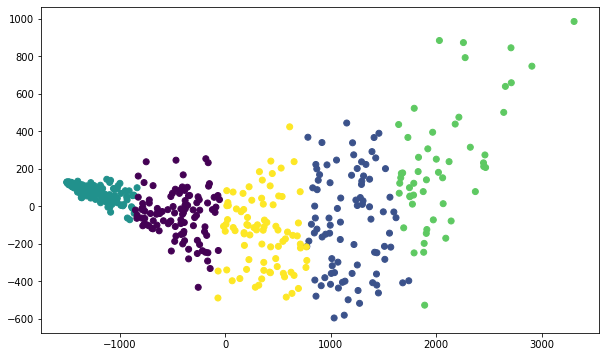

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [16]:
# Find LeBron player based on the clusters
LeBron = good_columns.loc[df['player'] == 'LeBron James', :]

# Find Durant player based on the clusters
Durant = good_columns.loc[df['player'] == 'Kevin Durant', :]

print("LeBron:\n\n", LeBron)
print("\n\nDurant:\n\n", Durant)

LeBron:

      age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  \
225   29  77  77  2902  767  1353  116   306  651  1047  ...   81  452  533   

     ast  stl  blk  tov   pf   pts  season_end  
225  488  121   26  270  126  2089        2013  

[1 rows x 22 columns]


Durant:

      age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  \
133   25  81  81  3122  849  1688  192   491  657  1197  ...   58  540  598   

     ast  stl  blk  tov   pf   pts  season_end  
133  445  103   59  285  174  2593        2013  

[1 rows x 22 columns]


In [17]:
# Converting data into lists for model prediction
LeBron_list = LeBron.values.tolist()
Durant_list = Durant.values.tolist()

# Predict the cluster LeBron and Durant belongs to
LeBron_cluster = kmeans_model.predict(LeBron_list)
Durant_cluster = kmeans_model.predict(Durant_list)

# LeBron
print('LeBron Cluster:', LeBron_cluster)

# Durant
print("Durant Cluster:", Durant_cluster)

LeBron Cluster: [3]
Durant Cluster: [3]


In [18]:
correlation_2 = df.drop(columns='season_end', axis=1).corr()

<AxesSubplot:>

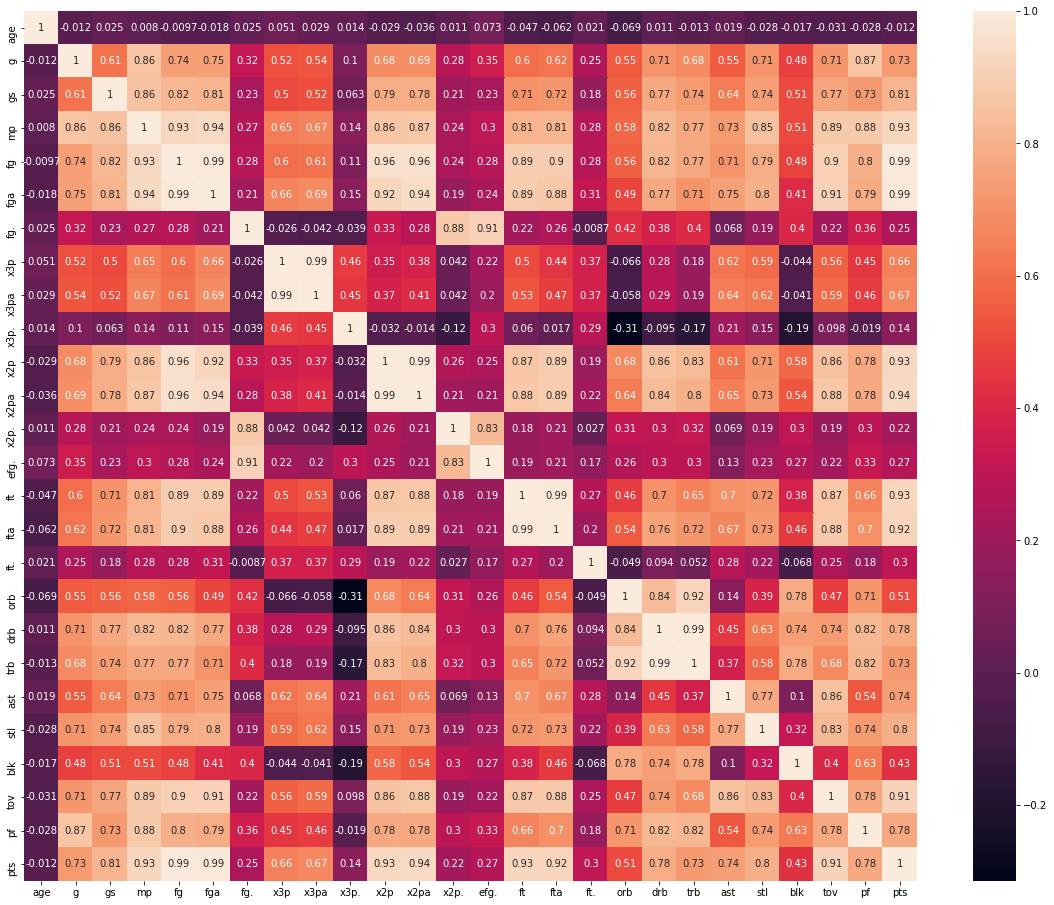

In [19]:
plt.figure(figsize=(20,16))
sns.heatmap(correlation_2, annot=True)

### 8. Make prediction using linear regression

In [20]:
# Split the data into 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['fg']], df[['ast']], test_size=0.20, random_state=1)

Predict the number of assist per player from filed goals 

In [21]:
from sklearn.linear_model import LinearRegression

# Creating the linear regression model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Make predictions
predictions = lr_model.predict(X_test)

In [22]:
type(predictions)

numpy.ndarray

In [23]:
df_prediction = pd.DataFrame(predictions, columns=['Prediction'])

In [24]:
df_prediction.head()

,Prediction
0,66.145809
1,96.297278
2,40.755099
3,69.319648
4,74.609379


In [25]:
# Inisialize new dataframe for comparing the result
df_compare = pd.DataFrame()

# Display into dataframe
df_compare['Prediction Value'] = df_prediction['Prediction']
df_compare['Actual Value'] = y_test.values

In [26]:
df_compare

,Prediction Value,Actual Value
0,66.145809,120
1,96.297278,477
2,40.755099,33
3,69.319648,179
4,74.609379,42
...,...,...
92,35.465367,56
93,6.371845,4
94,242.822836,118
95,42.342018,32


### 9. Test Model: Finding the coefficient of determination R^2 of the prediction

In [27]:
lr_confidence = lr_model.score(X_test, y_test)
print('Linear Regression Model Score:', lr_confidence)

Linear Regression Model Score: 0.4580024245757276


Well, fine we got only 0.45 score for the test data, is it bad - but yeah I learn the concept here

### 10. Build function to find players in cluster

In [28]:
def find_player_cluster(name):
    try:
        cluster = good_columns.loc[df['player'].str.lower() == name.lower(), :]
        cluster_list = cluster.values.tolist()
        cluster_values = kmeans_model.predict(cluster_list)
        print(f"{name} cluster is {cluster_values}")
    except:
        print("The player doesn't exist")

In [29]:
find_player_cluster('LeBron James')
find_player_cluster('Alexis ajinca')
find_player_cluster('christoper thomson')

LeBron James cluster is [3]
Alexis ajinca cluster is [0]
The player doesn't exist


To make sure the function work, you should importing the kmeans model in step 6

Thanks for read until this end

Have A Nice Code :)